In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install "lightly-train[ultralytics]" "supervision==0.25.1"

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.3/859.3 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/

In [ ]:
from ultralytics.data.utils import check_det_dataset
dataset = check_det_dataset("HomeObjects-3K.yaml")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

WARNING ⚠️ Dataset 'HomeObjects-3K.yaml' images not found, missing path '/content/datasets/homeobjects-3K/images/val'
Unzipping /content/datasets/homeobjects-3K.zip to /content/datasets/homeobjects-3K...: 100% ━━━━━━━━━━━━ 5386/5386 1.4Kfiles/s 4.0s
Dataset download success ✅ (12.3s), saved to /content/datasets



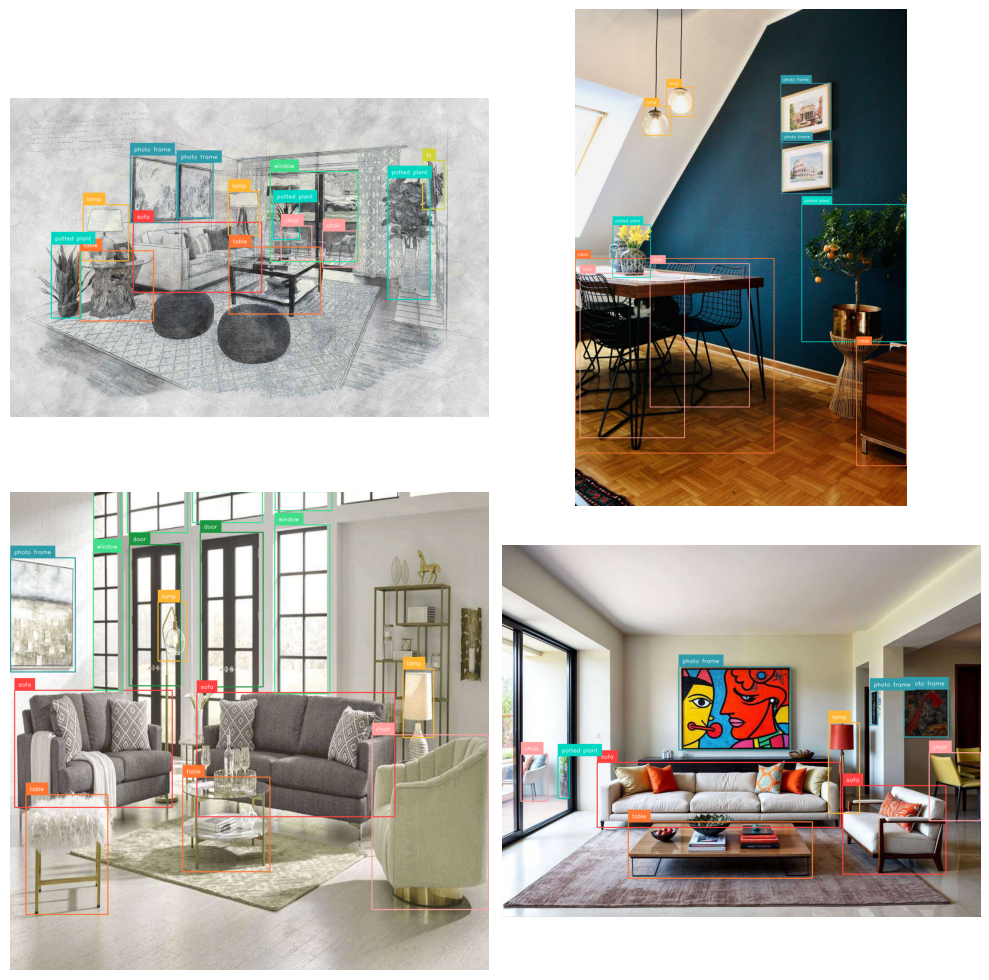

In [ ]:
import random
import matplotlib.pyplot as plt
import supervision as sv
import yaml

from ultralytics import settings
from ultralytics.data.utils import check_det_dataset

dataset = check_det_dataset("HomeObjects-3K.yaml")

detections = sv.DetectionDataset.from_yolo(
    data_yaml_path=dataset["yaml_file"],
    images_directory_path=f"{settings['datasets_dir']}/homeobjects-3K/images/train/",
    annotations_directory_path=f"{settings['datasets_dir']}/homeobjects-3K/labels/train/"
)

# read class name
with open(dataset["yaml_file"], "r") as f:
    data = yaml.safe_load(f)
names = data["names"]

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()

# select 4 images randomly
detections = [detections[random.randint(0, len(detections))] for _ in range(4)]

# processing and showing image
for i, (path, image, annotation) in enumerate(detections):
    annotated_image = box_annotator.annotate(scene=image, detections=annotation)
    annotated_image = label_annotator.annotate(
        scene=annotated_image,
        detections=annotation,
        labels=[names[elem] for elem in annotation.class_id],
    )
    ax[i].imshow(annotated_image[..., ::-1])
    ax[i].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
!ls "/content/drive/MyDrive/Glom/Dinov3"

dinov3_vits16_pretrain_lvd1689m-08c60483.pth


In [ ]:
import lightly_train
from ultralytics import settings
data_path = f"{settings['datasets_dir']}/homeobjects-3K/images/train"

if __name__ == "__main__":
    lightly_train.train(
        out="out/my_experiment",
        data=data_path,
        overwrite=True,
        model="ultralytics/yolo11s.yaml",
        method="distillation",
        method_args={
            "teacher": "dinov3/vits16",
            # Replace with your own url
            "teacher_url": "/content/drive/MyDrive/Glom/Dinov3/dinov3_vits16_pretrain_lvd1689m-08c60483.pth",
        }
    )

DEBUG:lightly_train._commands.common_helpers:Checking if output directory '/content/out/my_experiment' exists.
Args: {
    "accelerator": "auto",
    "batch_size": 128,
    "callbacks": null,
    "checkpoint": null,
    "data": "/content/datasets/homeobjects-3K/images/train",
    "devices": "auto",
    "embed_dim": null,
    "epochs": "auto",
    "float32_matmul_precision": "auto",
    "loader_args": null,
    "loggers": null,
    "method": "distillation",
    "method_args": {
        "teacher": "dinov3/vits16",
        "teacher_url": "/content/drive/MyDrive/Glom/Dinov3/dinov3_vits16_pretrain_lvd1689m-08c60483.pth"
    },
    "model": "ultralytics/yolo11s.yaml",
    "model_args": null,
    "num_nodes": 1,
    "num_workers": "auto",
    "optim": "auto",
    "optim_args": null,
    "out": "out/my_experiment",
    "overwrite": true,
    "precision": "32-true",
    "resume": null,
    "resume_interrupted": false,
    "seed": 0,
    "strategy": "auto",
    "trainer_args": null,
    "transfo

Training: |          | 0/? [00:00<?, ?it/s]

DEBUG:lightly_train._commands.common_helpers:Exporting model to '/content/out/my_experiment/exported_models/exported_last.pt' in format 'ModelFormat.PACKAGE_DEFAULT'.
DEBUG:lightly_train._commands.common_helpers:Exporting model to '/content/out/my_experiment/exported_models/exported_last.pt' in format 'ModelFormat.PACKAGE_DEFAULT'.
DEBUG:lightly_train._commands.common_helpers:Exporting model to '/content/out/my_experiment/exported_models/exported_last.pt' in format 'ModelFormat.PACKAGE_DEFAULT'.
DEBUG:lightly_train._commands.common_helpers:Exporting model to '/content/out/my_experiment/exported_models/exported_last.pt' in format 'ModelFormat.PACKAGE_DEFAULT'.
DEBUG:lightly_train._commands.common_helpers:Exporting model to '/content/out/my_experiment/exported_models/exported_last.pt' in format 'ModelFormat.PACKAGE_DEFAULT'.
DEBUG:lightly_train._commands.common_helpers:Exporting model to '/content/out/my_experiment/exported_models/exported_last.pt' in format 'ModelFormat.PACKAGE_DEFAULT'

In [ ]:
from ultralytics import YOLO

if __name__ == "__main__":
    # Load the exported model.
    model = YOLO("/content/out/my_experiment/exported_models/exported_last.pt")

    # Fine-tune with ultralytics.
    model.train(data = '/content/dataset/homeobjects-3K/HomeObjects-3K.yaml', epochs=50)

Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/homeobjects-3K/HomeObjects-3K.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/out/my_experiment/exported_models/exported_last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=au

RuntimeError: Dataset '/content/dataset/homeobjects-3K/HomeObjects-3K.yaml' error ❌ '/content/dataset/homeobjects-3K/HomeObjects-3K.yaml' does not exist